In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_csv('tracks.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
df['release_month'] = pd.to_datetime(df['release_date']).dt.month

In [5]:
df['num_artists'] = df['artists'].apply(lambda x: len(eval(x)))

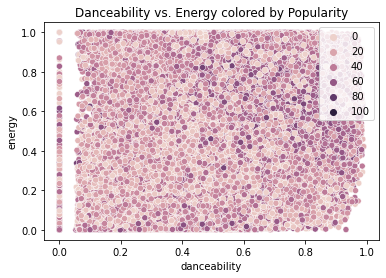

In [6]:
sns.scatterplot(x='danceability', y='energy', hue='popularity', data=df)
plt.title('Danceability vs. Energy colored by Popularity')
plt.legend(loc='upper right')  
plt.show()


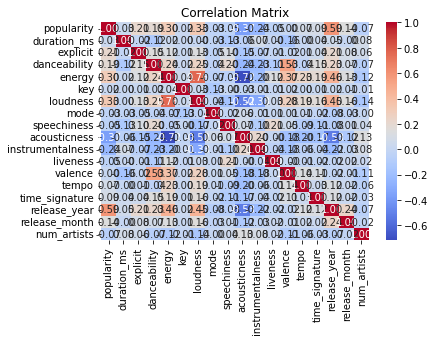

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [8]:
features_for_clustering = df[['danceability', 'energy']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_for_clustering)

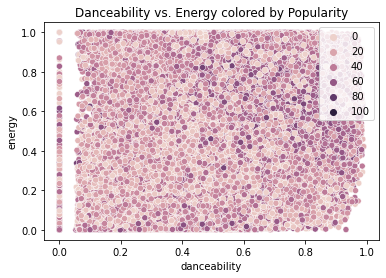

In [9]:
sns.scatterplot(x='danceability', y='energy', hue='popularity', data=df)
plt.title('Danceability vs. Energy colored by Popularity')
plt.legend(loc='upper right')  # Specify the legend location
plt.show()


In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['danceability', 'energy', 'duration_ms', 'explicit', 'num_artists']])


In [11]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]


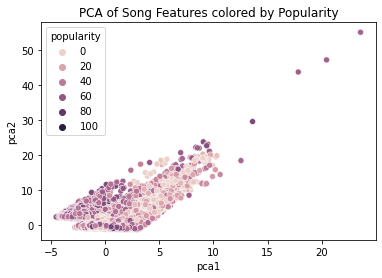

In [12]:
sns.scatterplot(x='pca1', y='pca2', hue='popularity', data=df)
plt.title('PCA of Song Features colored by Popularity')
plt.show()

In [13]:
X = df[['danceability', 'energy', 'duration_ms', 'explicit', 'num_artists']]
y = df['popularity']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [16]:
best_model = grid_search.best_estimator_


In [17]:
y_pred = best_model.predict(X_test)

In [18]:
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Best Model): {mse}')

Mean Squared Error (Best Model): 289.8501187341483
